# TikTok Strategist Studio 🎬✨  
**Create viral-ready video hooks with the help of AI**

Welcome to the **TikTok Strategist Studio** – your personal creative partner powered by AI. In this notebook, you’ll interact with an intelligent agent designed to help you:

- 🎯 Get clear on your **video topic**, **emotional tone**, and **target audience**
- ✍️ Craft **attention-grabbing opening hooks** (the first 3–5 seconds of your video)
- 📊 Score and improve your hook for maximum virality
- 🔁 Rewrite and explore new angles until it feels *just right*

---

## 🚀 What to Expect

- The assistant will **ask a few quick questions** to learn what your video is about.
- Once it knows the basics, it will **generate short hook examples**.
- If the hook doesn’t feel perfect, you can **ask it to try again** with a new style or mood.
- You'll get clear, strategic advice – in a fast and playful way.
---

## 📊 About the Dataset

To help the TikTok Strategist Agent learn from real-world examples, this project uses a [Dataset](https://www.kaggle.com/datasets/hoornik/tiktok-sample) of TikTok videos:

```python
df = pd.read_csv("/kaggle/input/tiktok-sample/tiktok_dataset.csv")
```
---

## 🛠️ How to Use This Notebook

This notebook is designed to **run automatically** from start to finish – no need to type anything unless you want to try your own ideas!

- A **USE_DEMO** flag is enabled by default: you’ll see a sample conversation play out on its own.
- If you want to interact live, you can toggle "USE_DEMO" to **False** (just follow the instructions in the cells).
- There’s nothing to install – everything runs right here.

---

## 💡 Pro Tip

TikTok success is often about trying *lots* of ideas. Use this tool like a creative partner – bounce ideas, remix tones, and see what grabs your attention. The best hook might be one you didn’t expect!

---

## 🙏 Acknowledgments

This project was inspired by **[Google 5-Day Gen AI Intensive Course on Kaggle](https://www.kaggle.com/learn-guide/5-day-genai)**.

Some of the conversational structure, design ideas, and instructional comments were adapted and built upon from their **BaristaBot** notebook in Day 3: Building an Agent with LangGraph.

Special thanks to the creators of that course for providing such a clear and accessible foundation to learn from.

---

## 📍 Let’s begin...

The strategist is ready to help you craft your next viral moment. Let’s make your content trend!

This agent builds on that knowledge and reimagines it for a creative content generation use case, helping users craft powerful TikTok hooks through iterative coaching.


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tiktok-sample/tiktok_dataset.csv


## Get set up
Start by installing and importing the LangGraph SDK and LangChain support for the Gemini API.

In [2]:
# Remove conflicting packages from the Kaggle base environment.
!pip uninstall -qqy kfp jupyterlab libpysal thinc spacy fastai ydata-profiling google-cloud-bigquery google-generativeai
# Install langgraph and the packages used in this lab.
!pip install -qU 'langgraph==0.3.21' 'langchain-google-genai==2.1.2' 'langgraph-prebuilt==0.1.7'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.0/138.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 26.7 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.9/433.9 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 kB 12.7 MB/s eta 0:00:00


### Set up your API key

The `GOOGLE_API_KEY` environment variable can be set to automatically configure the underlying API. This works for both the official Gemini Python SDK and for LangChain/LangGraph. 

To run the following cell, your API key must be stored it in a [Kaggle secret](https://www.kaggle.com/discussions/product-feedback/114053) named `GOOGLE_API_KEY`.

If you don't already have an API key, you can grab one from [AI Studio](https://aistudio.google.com/app/apikey). You can find [detailed instructions in the docs](https://ai.google.dev/gemini-api/docs/api-key).

To make the key available through Kaggle secrets, choose `Secrets` from the `Add-ons` menu and follow the instructions to add your key or enable it for this notebook.

In [3]:
import os
from kaggle_secrets import UserSecretsClient

GOOGLE_API_KEY = UserSecretsClient().get_secret("GOOGLE_API_KEY")
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY

## Demo Mode Flag

The `USE_DEMO` flag controls whether the agent runs in **demo mode** (with scripted replies) or **live mode** (with user input). This allows the conversation to run automatically for demonstration purposes.

In [6]:
USE_DEMO = True

## Dataset

Later in this notebook, we’ll use some of the most viewed hooks from this TikTok dataset to inspire our AI agent. By learning from real-world examples, the agent will better understand what makes a hook go viral, and use that insight to help you create your own magic.

In [5]:
df = pd.read_csv("/kaggle/input/tiktok-sample/tiktok_dataset.csv")
df.columns

Index(['text_hook', 'main_category', 'subcategory', 'length', 'views', 'likes',
       'comments', 'shares'],
      dtype='object')

## Agent State and Instructions

We defined a `HookAgentState` to manage conversation context, user preferences (topic, tone, audience), and completion status. The state ensures information flows consistently between nodes.

We also created a system instruction that shapes the assistant’s behavior as a TikTok Strategist — guiding how it asks questions, uses tools, and helps refine viral hooks. The welcome message sets the tone for a clear and engaging experience.


In [7]:
from typing import TypedDict, List, Optional
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages

class HookAgentState(TypedDict):
    # The chat conversation. This preserves the conversation history
    # between nodes. The `add_messages` annotation indicates to LangGraph
    # that state is updated by appending returned messages, not replacing
    # them.
    messages: Annotated[list, add_messages]
    # User's preference on the tiktok post topic category
    topic: str
    # User's preference on the hook text tone
    tone: str
    # User's preference on tiktok audiance targeting
    audience:str
    # Flag indicating that the request for hook text is completed.
    finished: bool

# The system instruction defines how the chatbot is expected to behave and includes
# rules for when to call different functions, as well as rules for the conversation, such
# as tone and what is permitted for discussion.
TIKTOKSTRATEGIST_SYSINT = (
    "system",  # 'system' indicates the message is a system instruction.
    """You are a professional TikTok Strategist, known for helping creators craft viral content through powerful hooks and emotional storytelling.

    Your job is to interact with the user (a content creator) and coach them on how to:
    1. Clarify their video topic, emotional tone, and target audience.
    2. Generate multiple attention-grabbing hooks that fit their goals.
    3. Score, refine, and improve hooks based on feedback.
    4. Repeat or reroute the creative process until a strong viral-ready hook is finalized.
    5. Your messages should be easy to read and clear. Keep the short and right to the point.
    
    You specialize in short-form content psychology, trends, and emotional resonance.
    
    Do not generate a hook immediately. First, use the tools ask_about_topic, ask_about_tone, and ask_about_audience to gather enough info. (e.g., inspirational, funny, shocking) and **audience** (e.g., students, moms, gamers, entrepreneurs).
    When you get the users topic then use map_to_main_category to convert the free-form topic that user sets to the main_category known.
    
    Once these are answered, you will:
    - Create a short, viral TikTok hook (under 20 words).
    - Score the hook from 0 to 1 based on potential virality.
    - If the score is under 0.8, generate an alternative hook in a different emotional style or audience targeting.
    
    You may use the following tools (if available in the environment):
    - `generate_hook(topic, tone, audience)` — returns a TikTok-style hook.
    - `score_hook(hook_text)` — evaluates virality and relevance.
    - `get_feedback()` — asks the user if the hook feels right.
    - `loop_rewrite()` — reruns generation with a new style.
    - You must use the available tools to complete your task. Do not ask the user to call tools manually.
    
    If a tool isn’t available yet, you may say: “Looks like this feature hasn’t been built yet — feel free to imagine how it’d work!”

    Always keep your responses short, creative, and strategic. Think like a coach who wants their student to go viral today.
""",
)

# This is the message with which the system opens the conversation.
WELCOME_MSG = (
    "Welcome to the TikTok Strategist Studio!\n \n"
    # Start bold
    "\033[1m"
    "Tell me your video idea, and I’ll guide you through killer opening lines. \n \n"
    "\033[0m"  
    # End bold
    "Type `q` to exit anytime. Let’s make you trend!"
)


## Seting Up the Language Model and Graph

We initialized the Gemini 2.0 Flash model from Google's Generative AI API to power the assistant’s responses.

We also imported core building blocks from LangGraph (`StateGraph`, `START`, `END`) to define the structure and flow of our conversational agent.


In [8]:
from langgraph.graph import StateGraph, START, END
from langchain_google_genai import ChatGoogleGenerativeAI


llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash")

## Handling Exit Logic

We added a routing function that checks if the conversation should end. If the user is finished, the agent exits; otherwise, it loops back to continue the chat.


In [9]:
from typing import Literal


def maybe_exit_human_node(state: HookAgentState) -> Literal["chatbot", "__end__"]:
    """Route to the chatbot, unless it looks like the user is exiting."""
    if state.get("finished", False):
        return END
    else:
        return "chatbot"


## Human-Model Interaction

We implemented a function to handle the interaction between the chatbot and the user. It displays the chatbot’s last message and waits for the user’s input. Depending on the user’s reply, the conversation either continues or ends if the user types exit commands.

### Two Approaches:
1. **Interactive mode:** Waits for real-time user input (`human_node`).
2. **Scripted demo mode:** Uses predefined inputs to simulate conversation (`human_node_demo`).

The `chatbot_with_welcome_msg` function starts the conversation and continues based on the user’s previous messages. The `StateGraph` manages the flow of the conversation between the chatbot and the user.



In [10]:
from pprint import pprint

from langchain_core.messages.ai import AIMessage


def human_node(state: HookAgentState) -> HookAgentState:
    """Display the last model message to the user, and receive the user's input."""
    last_msg = state["messages"][-1]
    print("Model:", last_msg.content)

    user_input = input("Reply: ")

    if user_input in {"q", "quit", "exit", "goodbye"}:
        state["finished"] = True

    return state | {"messages": [("user", user_input)]}

scripted_inputs = iter([
    "I want to make a video about dogs doing tricks",
    "Video and Image",
    "funny",
    "teens audience",
    "give me result please and no other question.",
    "q"
])

# def human_node_demo(state: HookAgentState) -> HookAgentState:
#     last_msg = state["messages"][-1]
#     print("\033[1mModel:\033[0m", last_msg.content)

#     try:
#         user_input = next(scripted_inputs)
#         print("\033[1mUser:\033[0m", user_input)
#     except StopIteration:
#         user_input = "q"

#     if user_input.lower() in {"q", "quit", "exit"}:
#         state["finished"] = True

#     return state | {"messages": [("user", user_input)]}
hook_generated = False  # Global flag

def human_node_demo(state: HookAgentState) -> HookAgentState:
    global hook_generated

    last_msg = state["messages"][-1]
    print("\033[1mModel:\033[0m", last_msg.content)

    # Check if the generate_hook tool has been called and responded
    for msg in state["messages"]:
        if hasattr(msg, "tool_call_id") and getattr(msg, "name", None) == "generate_hook":
            hook_generated = True

    try:
        user_input = next(scripted_inputs)
        print("\033[1mUser:\033[0m", user_input)
    except StopIteration:
        user_input = "q"

    # If user asked to quit and hook is generated, stop immediately
    if user_input.lower() in {"q", "quit", "exit"} and hook_generated:
        state["finished"] = True
        print("👋 Conversation finished.")
        return state  # ← Don't add another message

    # Otherwise, continue as normal
    return state | {"messages": [("user", user_input)]}


def chatbot_with_welcome_msg(state: HookAgentState) -> HookAgentState:
    """The chatbot itself. A wrapper around the model's own chat interface."""

    if state["messages"]:
        # If there are messages, continue the conversation with the Gemini model.
        new_output = llm.invoke([TIKTOKSTRATEGIST_SYSINT] + state["messages"])
    else:
        # If there are no messages, start with the welcome message.
        new_output = AIMessage(content=WELCOME_MSG)

    return state | {"messages": [new_output]}

## Define Tools for the Agent

We implemented a set of tools that the agent can call during the conversation. These tools help guide the user, generate hooks, provide examples, and loop through creative refinements.

Some tools ask for missing details (like topic, tone, or audience), while others provide feedback loops — such as scoring a hook or generating new ones. One also access the TikTok dataset to show real viral examples or map user topics to known content categories.


In [11]:
from langchain_core.tools import tool

@tool
def ask_about_topic() -> str:
    """Ask the user to describe the topic of their TikTok video."""

@tool
def ask_about_tone() -> str:
    """Ask the user to describe the tone they want (e.g. funny, dramatic, inspiring)."""

@tool
def ask_about_audience() -> str:
    """Ask the user to describe who they are targeting (e.g. moms, gamers, students)."""
    
@tool
def get_feedback() -> str:
    """Asks the user if the hook feels emotionally right and relevant."""
    # In real usage, you'd get this from a human — here it's simulated
    return "Not quite, can we make it funnier?"

@tool
def loop_rewrite() -> str:
    """Triggers regeneration of a new hook with a different tone or angle."""
    # This is a signal function; actual logic will be handled in the agent's graph
    return "Try rewriting it in a surprising or unexpected way."

@tool
def score_hook(hook_text: str) -> float:
    """Uses LLM to rate virality potential of a TikTok hook (0 to 1)."""
    prompt = f"""
        Rate the following TikTok hook from 0 to 1 based on how likely it is to go viral.
        
        Hook: "{hook_text}"
        
        Give only the score, like: 0.85
        """
    result = llm.invoke(prompt)
    try:
        return float(result.strip())
    except:
        return 0.5 

@tool
def get_sample_hook(topic: str, tone: str) -> str:
    """
    Retrieves 3 sample viral hooks for a given topic and tone.
    This helps the user get inspired before generating new ones.
    """
    import pandas as pd
    # Assuming df is a global variable (you can make this more modular too)
    examples = df[df['main_category'].str.contains(topic, case=False, na=False)]
    # Sort by view count descending
    examples = examples.sort_values(by="views", ascending=False).head(5)

    few_shots = "\n".join([
        f"- Hook: \"{row['text_hook']}\" (Generated with tone: {tone})"
        for _, row in examples.iterrows()
    ])

    return few_shots

@tool
def generate_hook(topic: str, tone: str, audience: str) -> str:
    """
    Provides a few-shot example from the dataset and instructs the agent
    to generate a new TikTok hook in a similar style.
    """
    import pandas as pd

    examples = df[df['main_category'].str.contains(topic, case=False, na=False)]
    examples = examples.sort_values(by="views", ascending=False).head(3)

    few_shots = "\n".join([
        f"- Hook: \"{row['text_hook']}\" (Generated with tone: {tone})"
        for _, row in examples.iterrows()
    ])

    return f"""
Here are some successful TikTok hooks in the '{tone}' tone:

{few_shots}

Now create a brand new short hook (under 20 words) in the same tone and style.
The topic is: {topic}
The target audience is: {audience}
Keep it emotional, bold, and scroll-stopping.
"""

@tool
def map_to_main_category(user_topic: str) -> str:
    """
    Maps a free-form user topic to one of the known main categories in the dataset.
    The model will be shown the valid categories and asked to select the closest match.
    """
    import pandas as pd
    
    # Assume df is already loaded globally
    valid_categories = df['main_category'].dropna().unique().tolist()

    return f"""
            You are given a list of valid TikTok content categories:
            {valid_categories}
            
            Choose the single best matching category for this user topic: "{user_topic}"
            
            Only return the category string, nothing else.
            """

In [12]:
# The default recursion limit for traversing nodes is 25 - setting it higher means
# you can try a more complex order with multiple steps and round-trips (and you
# can chat for longer!)
config = {"recursion_limit": 100}

## Connecting Tools and Building the Graph

We bundled all our tools into a `ToolNode`, allowing the agent to call them dynamically when needed. The model was bound to these tools so it can use them during conversation.

The graph was built using three main nodes: `chatbot`, `human`, and `tools`. We defined routing logic to decide when to call tools or continue chatting. After a tool runs, the conversation always returns to the chatbot.

Finally, we compiled the full graph and visualized the structure to confirm the flow between nodes.


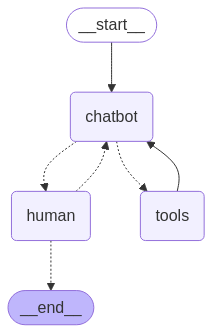

In [13]:
from langgraph.prebuilt import ToolNode
from IPython.display import Image, display

tools = [ask_about_topic, ask_about_tone, ask_about_audience, get_sample_hook, map_to_main_category,
        loop_rewrite, get_feedback, score_hook, generate_hook]
# Define the tools and create a "tools" node.
tool_node = ToolNode(tools)

# Attach the tools to the model so that it knows what it can call.
llm_with_tools = llm.bind_tools(tools, tool_choice="auto")


def maybe_route_to_tools(state: HookAgentState) -> Literal["tools", "human"]:
    if not (msgs := state.get("messages", [])):
        raise ValueError(f"No messages found when parsing state: {state}")
    msg = msgs[-1]
    return "tools" if hasattr(msg, "tool_calls") and msg.tool_calls else "human"


def chatbot_with_tools(state: HookAgentState) -> HookAgentState:
    defaults = {"audience": "", "topic": "", "tone": "", "finished": False}

    if state["messages"]:
        new_output = llm_with_tools.invoke([TIKTOKSTRATEGIST_SYSINT] + state["messages"])
    else:
        new_output = AIMessage(content=WELCOME_MSG)

    return defaults | state | {"messages": [new_output]}

graph_builder = StateGraph(HookAgentState)

# Add the nodes, including the new tool_node.
graph_builder.add_node("chatbot", chatbot_with_tools)
human_logic = human_node_demo if USE_DEMO else human_node
graph_builder.add_node("human", human_logic)
graph_builder.add_node("tools", tool_node)

# Chatbot may go to tools, or human.
graph_builder.add_conditional_edges("chatbot", maybe_route_to_tools)
# Human may go back to chatbot, or exit.
graph_builder.add_conditional_edges("human", maybe_exit_human_node)

# Tools always route back to chat afterwards.
graph_builder.add_edge("tools", "chatbot")

graph_builder.add_edge(START, "chatbot")
hook_generation_graph = graph_builder.compile()

Image(hook_generation_graph.get_graph().draw_mermaid_png())

In [16]:
state = hook_generation_graph.invoke({"messages": []}, config)

Model: Welcome to the TikTok Strategist Studio!
 
Tell me your video idea, and I’ll guide you through killer opening lines. 
 
Type `q` to exit anytime. Let’s make you trend!


Reply:  I want to make a video about dogs doing tricks


Model: Got it! What vibe are we going for? (e.g., funny, heartwarming, amazing)


Reply:  funny and surprising


Model: Okay, who are we trying to reach? (e.g., dog lovers, general audience)


Reply:  dog lovers and kids


Model: Okay, how about this: "I taught my dog to play dead... now he does it whenever I ask him to do the dishes!"
 
What do you think? Does that hook grab you?
 
If not, we can tweak it or try a totally different approach! Let me know.


Reply:  didn't like it, what else?


Model: Alright, let's flip it. How about: "My dog's so good at tricks, he can file my taxes... badly. 😂 #dogaccountant"
 
Does that hit the funny/surprising mark better? Or should we adjust again?


Reply:  good


Model: Okay, the algorithm gives that a 0.5. It could be stronger.

Let's try one more time. This time, I'm thinking pure kid-friendly humor:

"My dog does amazing tricks... like turning my homework into confetti! 🎉 #badDog #goodboy"

What do you think of THAT one? Is it closer to the viral sweet spot?


Reply:  q
